<a href="https://colab.research.google.com/github/AchmadLutfi196/23059-datamining/blob/main/Analisis_Sentimen_Ulasan_Tiktok_Dengan_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Sentimen Pengguna Aplikasi Shopee di Google Play Store Terkait Fitur COD dengan Menggunakan Metode SVM****

Review pada Google Play Store merupakan aspek penting yang digunakan pengguna untuk mengekspresikan penilaian mereka terhadap sebuah aplikasi. Aplikasi Shopee adalah platform e-commerce yang memungkinkan pengguna untuk melakukan berbagai aktivitas, seperti berbelanja, menjual produk, dan berinteraksi dengan penjual maupun pembeli lainnya. Aplikasi ini menyediakan fitur-fitur seperti penawaran menarik, sistem pembayaran yang mudah, layanan pelanggan, dan berbagai promosi.

Dalam sebuah penelitian, dilakukan proses pengumpulan data dari ulasan pengguna aplikasi Shopee melalui tahap scraping. Selanjutnya, data tersebut dilakukan pelabelan dengan mengkategorikan ulasan ke dalam kelas positif, negatif, dan netral. Kemudian, dilakukan text preprocessing untuk mengolah data dengan membersihkan, menyeleksi, dan mengubahnya menjadi data yang lebih terstruktur agar dapat diolah lebih lanjut sesuai kebutuhan penelitian.

Setelah mendapatkan data hasil text preprocessing, langkah berikutnya adalah melakukan pembobotan kata menggunakan metode Term Frequency – Inverse Document Frequency (TF-IDF). Metode ini memberikan nilai pada setiap kata dalam sebuah dokumen berdasarkan frekuensi kemunculan kata tersebut dalam seluruh dokumen yang ada.

Selanjutnya, data yang telah diolah menjalani proses klasifikasi menggunakan algoritma Support Vector Machine (SVM). SVM digunakan untuk mengklasifikasikan ulasan menjadi kategori sentimen yang tepat, seperti positif, negatif, atau netral berdasarkan pola-pola yang teridentifikasi dari data ulasan yang telah diproses sebelumnya.

Manfaat dilakukan analisis sentimen adalah:

1. Hasil analisis sentimen dapat dilihat oleh pengguna aplikasi Shopee dan digunakan untuk memahami opini pengguna lain.

2. Sebagai bahan pertimbangan bagi Shopee untuk meningkatkan dan menyempurnakan platformnya berdasarkan hasil analisis sentimen yang diperoleh.

    Dengan mengubah aplikasi yang disebutkan dari MyXL menjadi Shopee, fokusnya berpindah dari platform layanan telekomunikasi ke platform e-commerce. Dalam konteks ini, analisis sentimen tetap relevan untuk memahami opini pengguna dan memperbaiki layanan yang disediakan oleh Shopee.

# 1. Scraping Data

Scraping data dilakukan dengan mengumpukan data ulasan pengguna aplikasi Shopee dari Google Play Store menggunakan bantuan dari library google-play-scraper dan IDE Google Collab. Data yang diambil berupa nama pemberi ulasan, nilai bintang yang diberikan, waktu ulasan dikirim dan isi review ulasan.

In [1]:
pip install kagglehub[pandas-datasets]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
from collections import Counter

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Path ke file CSV dalam dataset
file_path = "hasil_scraper_ulasan_app_tiktok.csv"

# Load dataset TikTok dari Kaggle sebagai DataFrame
df_busu = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "fornigulo/ulasan-tik-tok-playstore",
    file_path
)

/tmp/ipython-input-3-3316289519.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_busu = kagglehub.load_dataset(


100%|██████████| 12.8M/12.8M [00:00<00:00, 22.3MB/s]


In [14]:
# Urutkan data berdasarkan tanggal ulasan terbaru
new_df = df_busu.sort_values(by='Date', ascending=False)

# Simpan ke file CSV
new_df.to_csv("Ulasan_TikTok.csv", index=False)

# 2. Case Folding

Case folding dilakukan pengubahan seluruh huruf menjadi kecil (lowercase) yang ada pada dokumen. Tahap ini akan dibantu dengan bantuan library RegEx.

In [17]:
print(new_df.columns.tolist())


['Review ID', 'Username', 'Rating', 'Review Text', 'Date']


In [18]:
import re

def cleaningulasan(content):
    ulasan = re.sub(r'@[A-Za-z0-9]+',' ', content)
    ulasan = re.sub(r'#[A-Za-z0-9]+',' ', ulasan)
    ulasan = re.sub(r"http\S+",' ', ulasan)
    ulasan = re.sub(r'[0-9]+',' ', ulasan)
    ulasan = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", ulasan)
    ulasan = ulasan.strip()
    return ulasan

def clearEmoji(content):
    return content.encode('ascii', 'ignore').decode('ascii')

def replaceTOM(content):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', content)

def casefoldingText(content):
    return content.lower()

# Salin DataFrame
new_df_copy = new_df.copy()

# Gunakan kolom 'Review Text' jika itu nama kolom ulasan kamu
new_df_copy['Cleaning'] = new_df_copy['Review Text'].apply(cleaningulasan)
new_df_copy['HapusEmoji'] = new_df_copy['Cleaning'].apply(clearEmoji)
new_df_copy['3_Lebih'] = new_df_copy['HapusEmoji'].apply(replaceTOM)
new_df_copy['CaseFolding'] = new_df_copy['3_Lebih'].apply(casefoldingText)

# Urutkan berdasarkan kolom 'Date'
sorted_df = new_df_copy.sort_values(by='Date', ascending=False)

# Simpan ke CSV
sorted_df.to_csv("Data_Ulasan_TikTok.csv", index=False)


In [19]:
new_df_copy.head()

,Review ID,Username,Rating,Review Text,Date,Cleaning,HapusEmoji,3_Lebih,CaseFolding
0,de4d9ffd-8ab2-4c99-956f-068ee2142ce7,Pengguna Google,5,bagus aku suka banget,2025-02-19 07:36:29,bagus aku suka banget,bagus aku suka banget,bagus aku suka banget,bagus aku suka banget
1,e791207c-29aa-40b1-9c17-3b93771e2539,Pengguna Google,5,Mantap,2025-02-19 07:35:50,Mantap,Mantap,Mantap,mantap
2,0cbe1fa8-25d8-4082-a48f-8fad62a3dde4,Pengguna Google,1,"Bisa mendownload tapi tidak bisa masuk,dan jik...",2025-02-19 07:35:06,Bisa mendownload tapi tidak bisa masuk dan jik...,Bisa mendownload tapi tidak bisa masuk dan jik...,Bisa mendownload tapi tidak bisa masuk dan jik...,bisa mendownload tapi tidak bisa masuk dan jik...
3,8eabce5c-b4cb-47e3-ae55-b33c93f325f1,Pengguna Google,1,Aku suka tiktok tetapi tidak bisa membuat jeda...,2025-02-19 07:34:08,Aku suka tiktok tetapi tidak bisa membuat jeda...,Aku suka tiktok tetapi tidak bisa membuat jeda...,Aku suka tiktok tetapi tidak bisa membuat jeda...,aku suka tiktok tetapi tidak bisa membuat jeda...
4,876c3be7-7f10-4358-891f-6c27262ccda7,Pengguna Google,1,Tiktok sekarang udah jelek kebanyakan di updat...,2025-02-19 07:33:29,Tiktok sekarang udah jelek kebanyakan di updat...,Tiktok sekarang udah jelek kebanyakan di updat...,Tiktok sekarang udah jelek kebanyakan di updat...,tiktok sekarang udah jelek kebanyakan di updat...


# 3. Pelabelan Dataset

Pelabelan dataset dilakukan secara manual terhadap pelabelan data kedalam kelas kategori positif, negatif atau netral. Proses ini akan dilakukan dengan bantuan ahli bahasa Indonesia dan dilakukan pelabelan oleh setidaknya lebih dari dua orang.

In [22]:
label = []
for index, row in new_df.iterrows():
  if row['Rating'] == 1 or row['Rating'] == 2:
    label.append('Negatif')
  elif row['Rating'] == 3:
    label.append('Netral')
  else:
    label.append('Positif')
new_df_copy['sentimen'] = label

In [23]:
new_df_copy.head()

,Review ID,Username,Rating,Review Text,Date,Cleaning,HapusEmoji,3_Lebih,CaseFolding,sentimen
0,de4d9ffd-8ab2-4c99-956f-068ee2142ce7,Pengguna Google,5,bagus aku suka banget,2025-02-19 07:36:29,bagus aku suka banget,bagus aku suka banget,bagus aku suka banget,bagus aku suka banget,Positif
1,e791207c-29aa-40b1-9c17-3b93771e2539,Pengguna Google,5,Mantap,2025-02-19 07:35:50,Mantap,Mantap,Mantap,mantap,Positif
2,0cbe1fa8-25d8-4082-a48f-8fad62a3dde4,Pengguna Google,1,"Bisa mendownload tapi tidak bisa masuk,dan jik...",2025-02-19 07:35:06,Bisa mendownload tapi tidak bisa masuk dan jik...,Bisa mendownload tapi tidak bisa masuk dan jik...,Bisa mendownload tapi tidak bisa masuk dan jik...,bisa mendownload tapi tidak bisa masuk dan jik...,Negatif
3,8eabce5c-b4cb-47e3-ae55-b33c93f325f1,Pengguna Google,1,Aku suka tiktok tetapi tidak bisa membuat jeda...,2025-02-19 07:34:08,Aku suka tiktok tetapi tidak bisa membuat jeda...,Aku suka tiktok tetapi tidak bisa membuat jeda...,Aku suka tiktok tetapi tidak bisa membuat jeda...,aku suka tiktok tetapi tidak bisa membuat jeda...,Negatif
4,876c3be7-7f10-4358-891f-6c27262ccda7,Pengguna Google,1,Tiktok sekarang udah jelek kebanyakan di updat...,2025-02-19 07:33:29,Tiktok sekarang udah jelek kebanyakan di updat...,Tiktok sekarang udah jelek kebanyakan di updat...,Tiktok sekarang udah jelek kebanyakan di updat...,tiktok sekarang udah jelek kebanyakan di updat...,Negatif


# 4. Tokenizing

Hasil proses case folding, kalimat akan diproses dengan menguraikannya menjadi token-token atau kata-kata. Pada tahap ini akan dibantu dengan library NLTK.

In [27]:
import nltk
# Download the 'punkt_tab' resource which is required by word_tokenize
nltk.download('punkt_tab')
nltk.download('punkt', force=True)  # paksa unduh ulang

from nltk.tokenize import word_tokenize

def tokenizingText(content):
    ulasan = word_tokenize(content)
    return ulasan

# Menerapkan tokenizingText pada setiap elemen di kolom 'CaseFolding'
new_df_copy['Tokenizing'] = new_df_copy['CaseFolding'].apply(tokenizingText)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [28]:
new_df_copy.head()

,Review ID,Username,Rating,Review Text,Date,Cleaning,HapusEmoji,3_Lebih,CaseFolding,sentimen,Tokenizing
0,de4d9ffd-8ab2-4c99-956f-068ee2142ce7,Pengguna Google,5,bagus aku suka banget,2025-02-19 07:36:29,bagus aku suka banget,bagus aku suka banget,bagus aku suka banget,bagus aku suka banget,Positif,"[bagus, aku, suka, banget]"
1,e791207c-29aa-40b1-9c17-3b93771e2539,Pengguna Google,5,Mantap,2025-02-19 07:35:50,Mantap,Mantap,Mantap,mantap,Positif,[mantap]
2,0cbe1fa8-25d8-4082-a48f-8fad62a3dde4,Pengguna Google,1,"Bisa mendownload tapi tidak bisa masuk,dan jik...",2025-02-19 07:35:06,Bisa mendownload tapi tidak bisa masuk dan jik...,Bisa mendownload tapi tidak bisa masuk dan jik...,Bisa mendownload tapi tidak bisa masuk dan jik...,bisa mendownload tapi tidak bisa masuk dan jik...,Negatif,"[bisa, mendownload, tapi, tidak, bisa, masuk, ..."
3,8eabce5c-b4cb-47e3-ae55-b33c93f325f1,Pengguna Google,1,Aku suka tiktok tetapi tidak bisa membuat jeda...,2025-02-19 07:34:08,Aku suka tiktok tetapi tidak bisa membuat jeda...,Aku suka tiktok tetapi tidak bisa membuat jeda...,Aku suka tiktok tetapi tidak bisa membuat jeda...,aku suka tiktok tetapi tidak bisa membuat jeda...,Negatif,"[aku, suka, tiktok, tetapi, tidak, bisa, membu..."
4,876c3be7-7f10-4358-891f-6c27262ccda7,Pengguna Google,1,Tiktok sekarang udah jelek kebanyakan di updat...,2025-02-19 07:33:29,Tiktok sekarang udah jelek kebanyakan di updat...,Tiktok sekarang udah jelek kebanyakan di updat...,Tiktok sekarang udah jelek kebanyakan di updat...,tiktok sekarang udah jelek kebanyakan di updat...,Negatif,"[tiktok, sekarang, udah, jelek, kebanyakan, di..."


# 5. Formalisasi

Tahap formalisasi dilakukan untuk pengubah penggunaan kata tidak baku menjadi baku sesuai dengan KBBI. Proses akan menggunakan file dataset slangwords yang berisi kata slang yang nanti akan diubah menjadi baku. Tahap ini dibantu dengan library RegEx.

In [30]:
import re
import requests

def convertToSlangword(tokens):
    # Load slang word dictionary from GitHub
    url = "https://raw.githubusercontent.com/AchmadLutfi196/23059-datamining/main/slangwords.txt"
    response = requests.get(url)
    kamusSlang = eval(response.text)  # Pastikan isinya memang dictionary

    # Compile pattern dari semua slang words
    pattern = re.compile(r'\b(' + '|'.join(re.escape(k) for k in kamusSlang.keys()) + r')\b', re.IGNORECASE)

    result = []
    for kata in tokens:
        filterSlang = pattern.sub(lambda x: kamusSlang.get(x.group().lower(), x.group()), kata)
        result.append(filterSlang.lower())

    return result


In [31]:
new_df_copy.head(20)

,Review ID,Username,Rating,Review Text,Date,Cleaning,HapusEmoji,3_Lebih,CaseFolding,sentimen,Tokenizing
0,de4d9ffd-8ab2-4c99-956f-068ee2142ce7,Pengguna Google,5,bagus aku suka banget,2025-02-19 07:36:29,bagus aku suka banget,bagus aku suka banget,bagus aku suka banget,bagus aku suka banget,Positif,"[bagus, aku, suka, banget]"
1,e791207c-29aa-40b1-9c17-3b93771e2539,Pengguna Google,5,Mantap,2025-02-19 07:35:50,Mantap,Mantap,Mantap,mantap,Positif,[mantap]
2,0cbe1fa8-25d8-4082-a48f-8fad62a3dde4,Pengguna Google,1,"Bisa mendownload tapi tidak bisa masuk,dan jik...",2025-02-19 07:35:06,Bisa mendownload tapi tidak bisa masuk dan jik...,Bisa mendownload tapi tidak bisa masuk dan jik...,Bisa mendownload tapi tidak bisa masuk dan jik...,bisa mendownload tapi tidak bisa masuk dan jik...,Negatif,"[bisa, mendownload, tapi, tidak, bisa, masuk, ..."
3,8eabce5c-b4cb-47e3-ae55-b33c93f325f1,Pengguna Google,1,Aku suka tiktok tetapi tidak bisa membuat jeda...,2025-02-19 07:34:08,Aku suka tiktok tetapi tidak bisa membuat jeda...,Aku suka tiktok tetapi tidak bisa membuat jeda...,Aku suka tiktok tetapi tidak bisa membuat jeda...,aku suka tiktok tetapi tidak bisa membuat jeda...,Negatif,"[aku, suka, tiktok, tetapi, tidak, bisa, membu..."
4,876c3be7-7f10-4358-891f-6c27262ccda7,Pengguna Google,1,Tiktok sekarang udah jelek kebanyakan di updat...,2025-02-19 07:33:29,Tiktok sekarang udah jelek kebanyakan di updat...,Tiktok sekarang udah jelek kebanyakan di updat...,Tiktok sekarang udah jelek kebanyakan di updat...,tiktok sekarang udah jelek kebanyakan di updat...,Negatif,"[tiktok, sekarang, udah, jelek, kebanyakan, di..."
5,9eac358b-5174-42a6-91bb-daebbc270371,Pengguna Google,4,Gabisa masuk tik tok najis,2025-02-19 07:32:55,Gabisa masuk tik tok najis,Gabisa masuk tik tok najis,Gabisa masuk tik tok najis,gabisa masuk tik tok najis,Positif,"[gabisa, masuk, tik, tok, najis]"
6,556ba837-fafb-4764-964a-1ecb1715f0e7,Pengguna Google,5,Salam Rahayu semuanya,2025-02-19 07:31:55,Salam Rahayu semuanya,Salam Rahayu semuanya,Salam Rahayu semuanya,salam rahayu semuanya,Positif,"[salam, rahayu, semuanya]"
7,147b41cc-f285-45ff-990f-c4b030c8eba1,Pengguna Google,3,Karena akun ku ga fyp fyp kan cape bikin video...,2025-02-19 07:29:09,Karena akun ku ga fyp fyp kan cape bikin video...,Karena akun ku ga fyp fyp kan cape bikin video...,Karena akun ku ga fyp fyp kan cape bikin video...,karena akun ku ga fyp fyp kan cape bikin video...,Netral,"[karena, akun, ku, ga, fyp, fyp, kan, cape, bi..."
8,237e1d0b-1064-4d24-8bdc-1e6280402f3f,Pengguna Google,5,Tik tok kenapa aku mau main Tik tok kenapa ngg...,2025-02-19 07:28:30,Tik tok kenapa aku mau main Tik tok kenapa ngg...,Tik tok kenapa aku mau main Tik tok kenapa ngg...,Tik tok kenapa aku mau main Tik tok kenapa ngg...,tik tok kenapa aku mau main tik tok kenapa ngg...,Positif,"[tik, tok, kenapa, aku, mau, main, tik, tok, k..."
9,6676a09a-b386-4f3b-8dff-dbbe9953c006,Pengguna Google,5,Saya sedikit kecewa dengan tiktok karna pas ma...,2025-02-19 07:28:18,Saya sedikit kecewa dengan tiktok karna pas ma...,Saya sedikit kecewa dengan tiktok karna pas ma...,Saya sedikit kecewa dengan tiktok karna pas ma...,saya sedikit kecewa dengan tiktok karna pas ma...,Positif,"[saya, sedikit, kecewa, dengan, tiktok, karna,..."


# 6. Stopword Removal

Hasil proses formalisasi kemudian akan dilakukan seleksi kata yang tidak penting dan menghapus kata tersebut. Tahap ini dibantu dengan library NLTK.

In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

daftar_stopword = stopwords.words('indonesian')
# Append additional stopwords
daftar_stopword.extend(["yg", "dg", "rt"])
daftar_stopword = set(daftar_stopword)

def stopwordText(words):
    return [word for word in words if word not in daftar_stopword]

# Assuming 'new_df' contains the data and 'Tokenizing' column has the tokenized words
new_df_copy['WithoutStopwords'] = new_df_copy['Tokenizing'].apply(stopwordText)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
new_df_copy.head()

,Review ID,Username,Rating,Review Text,Date,Cleaning,HapusEmoji,3_Lebih,CaseFolding,sentimen,Tokenizing,WithoutStopwords
0,de4d9ffd-8ab2-4c99-956f-068ee2142ce7,Pengguna Google,5,bagus aku suka banget,2025-02-19 07:36:29,bagus aku suka banget,bagus aku suka banget,bagus aku suka banget,bagus aku suka banget,Positif,"[bagus, aku, suka, banget]","[bagus, suka, banget]"
1,e791207c-29aa-40b1-9c17-3b93771e2539,Pengguna Google,5,Mantap,2025-02-19 07:35:50,Mantap,Mantap,Mantap,mantap,Positif,[mantap],[mantap]
2,0cbe1fa8-25d8-4082-a48f-8fad62a3dde4,Pengguna Google,1,"Bisa mendownload tapi tidak bisa masuk,dan jik...",2025-02-19 07:35:06,Bisa mendownload tapi tidak bisa masuk dan jik...,Bisa mendownload tapi tidak bisa masuk dan jik...,Bisa mendownload tapi tidak bisa masuk dan jik...,bisa mendownload tapi tidak bisa masuk dan jik...,Negatif,"[bisa, mendownload, tapi, tidak, bisa, masuk, ...","[mendownload, masuk, masuk, aplikasi, nya, tik..."
3,8eabce5c-b4cb-47e3-ae55-b33c93f325f1,Pengguna Google,1,Aku suka tiktok tetapi tidak bisa membuat jeda...,2025-02-19 07:34:08,Aku suka tiktok tetapi tidak bisa membuat jeda...,Aku suka tiktok tetapi tidak bisa membuat jeda...,Aku suka tiktok tetapi tidak bisa membuat jeda...,aku suka tiktok tetapi tidak bisa membuat jeda...,Negatif,"[aku, suka, tiktok, tetapi, tidak, bisa, membu...","[suka, tiktok, jeda, patah, patah, gk, suka]"
4,876c3be7-7f10-4358-891f-6c27262ccda7,Pengguna Google,1,Tiktok sekarang udah jelek kebanyakan di updat...,2025-02-19 07:33:29,Tiktok sekarang udah jelek kebanyakan di updat...,Tiktok sekarang udah jelek kebanyakan di updat...,Tiktok sekarang udah jelek kebanyakan di updat...,tiktok sekarang udah jelek kebanyakan di updat...,Negatif,"[tiktok, sekarang, udah, jelek, kebanyakan, di...","[tiktok, udah, jelek, kebanyakan, update, lemo..."


# 7. Stemming

Proses stemming dilakukan perubahan kata yang berimbuhan menjadi kata dasar. Tahap ini dibantu dengan library Sastrawi dan Swifter.

In [35]:
!pip install Sastrawi
!pip install swifter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in new_df_copy['WithoutStopwords']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

def stemmingText(document):
    return [term_dict[term] for term in document]

new_df_copy['Stemming'] = new_df_copy['WithoutStopwords'].swifter.apply(stemmingText)

Streaming output truncated to the last 5000 lines.
ilmuwan : ilmuwan
ptada : ptada
tracker : tracker
price : price
award : award
hip : hip
danjok : danjok
manasilkan : manasilkan
uan : uan
carana : carana
bemampaat : bemampaat
selomoin : selomoin
dimute : mute
ngaa : ngaa
kags : kags
bagusla : bagusla
buntut : buntut
ngelex : ngelex
menatik : menatik
batak : batak
bregsek : bregsek
kemblikan : kemblikan
menum : tum
utam : utam
silau : silau
teme : teme
aplakasiya : aplakasiya
angap : angap
row : row
gagasan : gagas
monyey : monyey
asslamualaikum : asslamualaikum
jeung : jeung
gkt : gkt
pasir : pasir
dimudah : mudah
kemain : main
dlq : dlq
sebenerny : sebenerny
muaskan : muas
snaagt : snaagt
weleh : weh
ikh : ikh
berkebang : bang
keupload : keupload
istaka : istaka
acuddshe : acuddshe
otg : otg
swarane : swarane
luji : luji
argghhgh : argghhgh
temensya : temensya
diperbaikki : diperbaikki
icikiwir : icikiwir
iwhh : iwhh
situh : situh
syah : syah
memuakan : mua
membosenkan : membosenkan


Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]

In [37]:
new_df_copy.head()

,Review ID,Username,Rating,Review Text,Date,Cleaning,HapusEmoji,3_Lebih,CaseFolding,sentimen,Tokenizing,WithoutStopwords,Stemming
0,de4d9ffd-8ab2-4c99-956f-068ee2142ce7,Pengguna Google,5,bagus aku suka banget,2025-02-19 07:36:29,bagus aku suka banget,bagus aku suka banget,bagus aku suka banget,bagus aku suka banget,Positif,"[bagus, aku, suka, banget]","[bagus, suka, banget]","[bagus, suka, banget]"
1,e791207c-29aa-40b1-9c17-3b93771e2539,Pengguna Google,5,Mantap,2025-02-19 07:35:50,Mantap,Mantap,Mantap,mantap,Positif,[mantap],[mantap],[mantap]
2,0cbe1fa8-25d8-4082-a48f-8fad62a3dde4,Pengguna Google,1,"Bisa mendownload tapi tidak bisa masuk,dan jik...",2025-02-19 07:35:06,Bisa mendownload tapi tidak bisa masuk dan jik...,Bisa mendownload tapi tidak bisa masuk dan jik...,Bisa mendownload tapi tidak bisa masuk dan jik...,bisa mendownload tapi tidak bisa masuk dan jik...,Negatif,"[bisa, mendownload, tapi, tidak, bisa, masuk, ...","[mendownload, masuk, masuk, aplikasi, nya, tik...","[mendownload, masuk, masuk, aplikasi, nya, tik..."
3,8eabce5c-b4cb-47e3-ae55-b33c93f325f1,Pengguna Google,1,Aku suka tiktok tetapi tidak bisa membuat jeda...,2025-02-19 07:34:08,Aku suka tiktok tetapi tidak bisa membuat jeda...,Aku suka tiktok tetapi tidak bisa membuat jeda...,Aku suka tiktok tetapi tidak bisa membuat jeda...,aku suka tiktok tetapi tidak bisa membuat jeda...,Negatif,"[aku, suka, tiktok, tetapi, tidak, bisa, membu...","[suka, tiktok, jeda, patah, patah, gk, suka]","[suka, tiktok, jeda, patah, patah, gk, suka]"
4,876c3be7-7f10-4358-891f-6c27262ccda7,Pengguna Google,1,Tiktok sekarang udah jelek kebanyakan di updat...,2025-02-19 07:33:29,Tiktok sekarang udah jelek kebanyakan di updat...,Tiktok sekarang udah jelek kebanyakan di updat...,Tiktok sekarang udah jelek kebanyakan di updat...,tiktok sekarang udah jelek kebanyakan di updat...,Negatif,"[tiktok, sekarang, udah, jelek, kebanyakan, di...","[tiktok, udah, jelek, kebanyakan, update, lemo...","[tiktok, udah, jelek, banyak, update, lot, tam..."


# 8. Visualisasi Data (NLP)
Visualisasi data dalam pemrosesan bahasa alami (Natural Language Processing/NLP) melibatkan representasi grafis dari informasi yang terdapat dalam teks atau data teks yang telah diproses. Ini membantu dalam pemahaman, analisis, dan komunikasi hasil dari algoritma pemrosesan bahasa alami.

In [39]:
print(new_df_copy.columns)


Index(['Review ID', 'Username', 'Rating', 'Review Text', 'Date', 'Cleaning',
       'HapusEmoji', '3_Lebih', 'CaseFolding', 'sentimen', 'Tokenizing',
       'WithoutStopwords', 'Stemming'],
      dtype='object')


In [40]:
# Menyalin data dengan sentimen negatif
train_s0 = new_df_copy[new_df_copy['sentimen'] == 'Negatif'].copy()

# Mengisi nilai kosong di kolom 'Review Text'
train_s0.loc[:, 'Review Text'] = train_s0['Review Text'].fillna("tidak ada komentar")

# Menampilkan 5 baris pertama
train_s0.head()


,Review ID,Username,Rating,Review Text,Date,Cleaning,HapusEmoji,3_Lebih,CaseFolding,sentimen,Tokenizing,WithoutStopwords,Stemming
2,0cbe1fa8-25d8-4082-a48f-8fad62a3dde4,Pengguna Google,1,"Bisa mendownload tapi tidak bisa masuk,dan jik...",2025-02-19 07:35:06,Bisa mendownload tapi tidak bisa masuk dan jik...,Bisa mendownload tapi tidak bisa masuk dan jik...,Bisa mendownload tapi tidak bisa masuk dan jik...,bisa mendownload tapi tidak bisa masuk dan jik...,Negatif,"[bisa, mendownload, tapi, tidak, bisa, masuk, ...","[mendownload, masuk, masuk, aplikasi, nya, tik...","[mendownload, masuk, masuk, aplikasi, nya, tik..."
3,8eabce5c-b4cb-47e3-ae55-b33c93f325f1,Pengguna Google,1,Aku suka tiktok tetapi tidak bisa membuat jeda...,2025-02-19 07:34:08,Aku suka tiktok tetapi tidak bisa membuat jeda...,Aku suka tiktok tetapi tidak bisa membuat jeda...,Aku suka tiktok tetapi tidak bisa membuat jeda...,aku suka tiktok tetapi tidak bisa membuat jeda...,Negatif,"[aku, suka, tiktok, tetapi, tidak, bisa, membu...","[suka, tiktok, jeda, patah, patah, gk, suka]","[suka, tiktok, jeda, patah, patah, gk, suka]"
4,876c3be7-7f10-4358-891f-6c27262ccda7,Pengguna Google,1,Tiktok sekarang udah jelek kebanyakan di updat...,2025-02-19 07:33:29,Tiktok sekarang udah jelek kebanyakan di updat...,Tiktok sekarang udah jelek kebanyakan di updat...,Tiktok sekarang udah jelek kebanyakan di updat...,tiktok sekarang udah jelek kebanyakan di updat...,Negatif,"[tiktok, sekarang, udah, jelek, kebanyakan, di...","[tiktok, udah, jelek, kebanyakan, update, lemo...","[tiktok, udah, jelek, banyak, update, lot, tam..."
11,95f50f31-326e-4342-a152-ddc24d42887a,Pengguna Google,1,karna tidak bisa di buka,2025-02-19 07:28:04,karna tidak bisa di buka,karna tidak bisa di buka,karna tidak bisa di buka,karna tidak bisa di buka,Negatif,"[karna, tidak, bisa, di, buka]","[karna, buka]","[karna, buka]"
12,586287e6-e5c6-4338-955f-05fa202e3113,Pengguna Google,1,gak bisa masuk,2025-02-19 07:27:52,gak bisa masuk,gak bisa masuk,gak bisa masuk,gak bisa masuk,Negatif,"[gak, bisa, masuk]","[gak, masuk]","[gak, masuk]"


In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

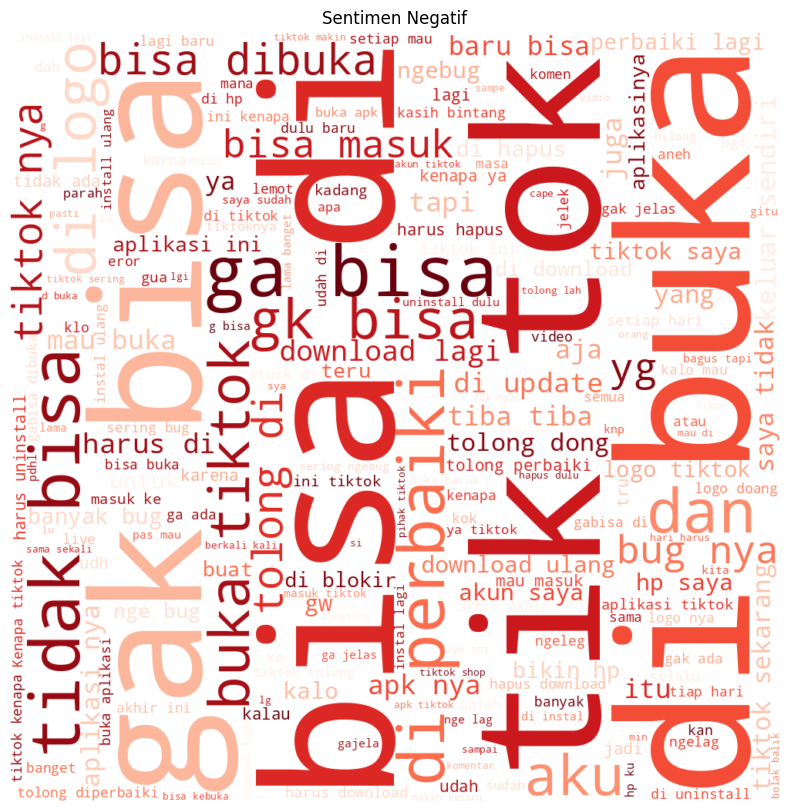

In [43]:
all_text_s0 = ' '.join(word for word in train_s0['Review Text'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title("Sentimen Negatif")
plt.show()

In [45]:
train_s1 = new_df_copy[new_df_copy['sentimen'] == 'Netral'].copy()
train_s1.loc[:, 'Review Text'] = train_s1['Review Text'].fillna("tidak ada komentar")
train_s1.head()

,Review ID,Username,Rating,Review Text,Date,Cleaning,HapusEmoji,3_Lebih,CaseFolding,sentimen,Tokenizing,WithoutStopwords,Stemming
7,147b41cc-f285-45ff-990f-c4b030c8eba1,Pengguna Google,3,Karena akun ku ga fyp fyp kan cape bikin video...,2025-02-19 07:29:09,Karena akun ku ga fyp fyp kan cape bikin video...,Karena akun ku ga fyp fyp kan cape bikin video...,Karena akun ku ga fyp fyp kan cape bikin video...,karena akun ku ga fyp fyp kan cape bikin video...,Netral,"[karena, akun, ku, ga, fyp, fyp, kan, cape, bi...","[akun, ku, ga, fyp, fyp, cape, bikin, video, m...","[akun, ku, ga, fyp, fyp, cape, bikin, video, m..."
14,b32d538c-6397-4547-ba77-7e7d2f2de359,Pengguna Google,3,Karenan kadang dak bisa di pencet,2025-02-19 07:26:34,Karenan kadang dak bisa di pencet,Karenan kadang dak bisa di pencet,Karenan kadang dak bisa di pencet,karenan kadang dak bisa di pencet,Netral,"[karenan, kadang, dak, bisa, di, pencet]","[karenan, kadang, dak, pencet]","[karenan, kadang, dak, pencet]"
33,29135e43-c87a-40c3-802a-d41c6038740c,Pengguna Google,3,"Kenapa sekarang apknya kadang gk bisa dibuka ,...",2025-02-19 07:12:16,Kenapa sekarang apknya kadang gk bisa dibuka ...,Kenapa sekarang apknya kadang gk bisa dibuka ...,Kenapa sekarang apknya kadang gk bisa dibuka ...,kenapa sekarang apknya kadang gk bisa dibuka ...,Netral,"[kenapa, sekarang, apknya, kadang, gk, bisa, d...","[apknya, kadang, gk, dibuka, gk, login, masuk,...","[apknya, kadang, gk, buka, gk, login, masuk, k..."
36,994275fd-23f2-4228-98cd-49ef35ca694d,Pengguna Google,3,kadang suka tidak bisa dipijitt,2025-02-19 07:10:59,kadang suka tidak bisa dipijitt,kadang suka tidak bisa dipijitt,kadang suka tidak bisa dipijitt,kadang suka tidak bisa dipijitt,Netral,"[kadang, suka, tidak, bisa, dipijitt]","[kadang, suka, dipijitt]","[kadang, suka, dipijitt]"
38,e04e628e-b8e8-4146-b444-bde7f57b523a,Pengguna Google,3,"Aplikasi penjajah, ngiklan pun ga efektif dasa...",2025-02-19 07:10:00,Aplikasi penjajah ngiklan pun ga efektif dasa...,Aplikasi penjajah ngiklan pun ga efektif dasa...,Aplikasi penjajah ngiklan pun ga efektif dasa...,aplikasi penjajah ngiklan pun ga efektif dasa...,Netral,"[aplikasi, penjajah, ngiklan, pun, ga, efektif...","[aplikasi, penjajah, ngiklan, ga, efektif, das...","[aplikasi, jajah, ngiklan, ga, efektif, dasar,..."


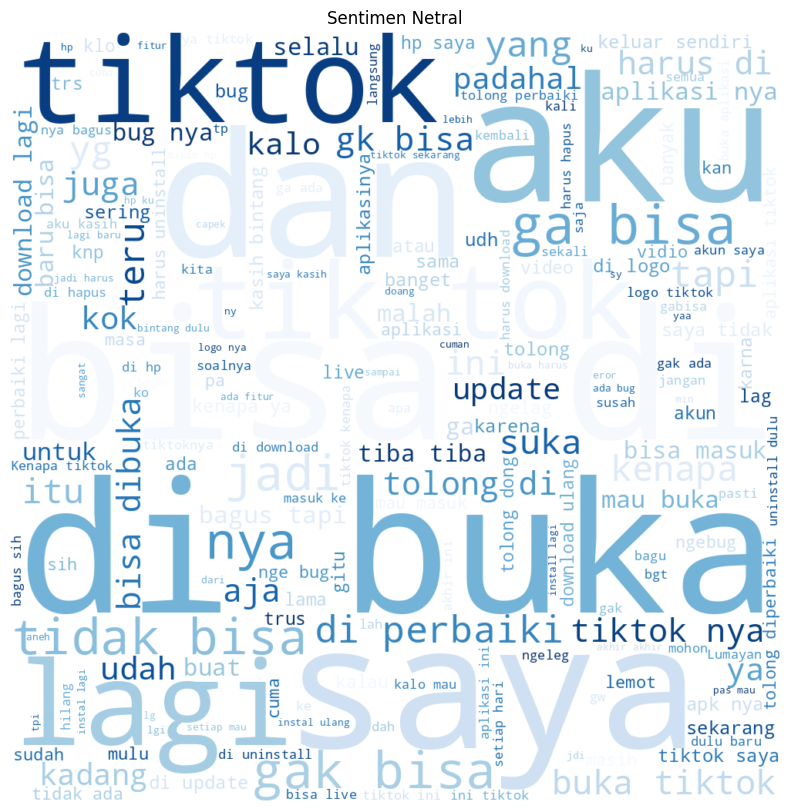

In [47]:
all_text_s1 = ' '.join(word for word in train_s1['Review Text'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title("Sentimen Netral")
plt.show()

In [46]:
train_s2 = new_df_copy[new_df_copy['sentimen'] == 'Positif'].copy()
train_s2.loc[:, 'Review Text'] = train_s2['Review Text'].fillna("tidak ada komentar")
train_s2.head()

,Review ID,Username,Rating,Review Text,Date,Cleaning,HapusEmoji,3_Lebih,CaseFolding,sentimen,Tokenizing,WithoutStopwords,Stemming
0,de4d9ffd-8ab2-4c99-956f-068ee2142ce7,Pengguna Google,5,bagus aku suka banget,2025-02-19 07:36:29,bagus aku suka banget,bagus aku suka banget,bagus aku suka banget,bagus aku suka banget,Positif,"[bagus, aku, suka, banget]","[bagus, suka, banget]","[bagus, suka, banget]"
1,e791207c-29aa-40b1-9c17-3b93771e2539,Pengguna Google,5,Mantap,2025-02-19 07:35:50,Mantap,Mantap,Mantap,mantap,Positif,[mantap],[mantap],[mantap]
5,9eac358b-5174-42a6-91bb-daebbc270371,Pengguna Google,4,Gabisa masuk tik tok najis,2025-02-19 07:32:55,Gabisa masuk tik tok najis,Gabisa masuk tik tok najis,Gabisa masuk tik tok najis,gabisa masuk tik tok najis,Positif,"[gabisa, masuk, tik, tok, najis]","[gabisa, masuk, tik, tok, najis]","[gabisa, masuk, tik, tok, najis]"
6,556ba837-fafb-4764-964a-1ecb1715f0e7,Pengguna Google,5,Salam Rahayu semuanya,2025-02-19 07:31:55,Salam Rahayu semuanya,Salam Rahayu semuanya,Salam Rahayu semuanya,salam rahayu semuanya,Positif,"[salam, rahayu, semuanya]","[salam, rahayu]","[salam, rahayu]"
8,237e1d0b-1064-4d24-8bdc-1e6280402f3f,Pengguna Google,5,Tik tok kenapa aku mau main Tik tok kenapa ngg...,2025-02-19 07:28:30,Tik tok kenapa aku mau main Tik tok kenapa ngg...,Tik tok kenapa aku mau main Tik tok kenapa ngg...,Tik tok kenapa aku mau main Tik tok kenapa ngg...,tik tok kenapa aku mau main tik tok kenapa ngg...,Positif,"[tik, tok, kenapa, aku, mau, main, tik, tok, k...","[tik, tok, main, tik, tok, nggak, main, tik, t...","[tik, tok, main, tik, tok, nggak, main, tik, t..."


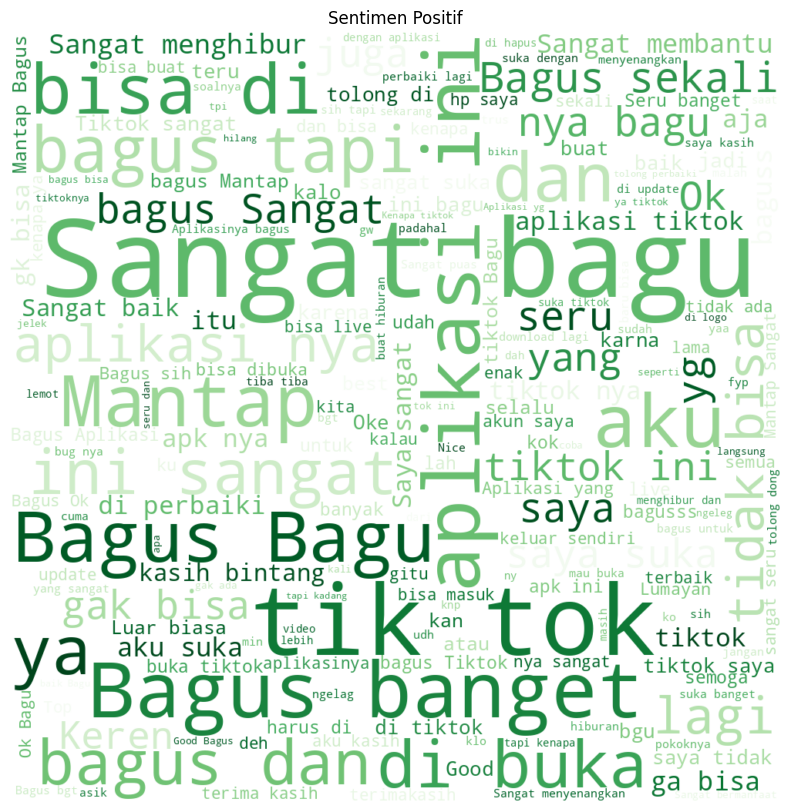

In [49]:
all_text_s2 = ' '.join(word for word in train_s2['Review Text'])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s2)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title("Sentimen Positif")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

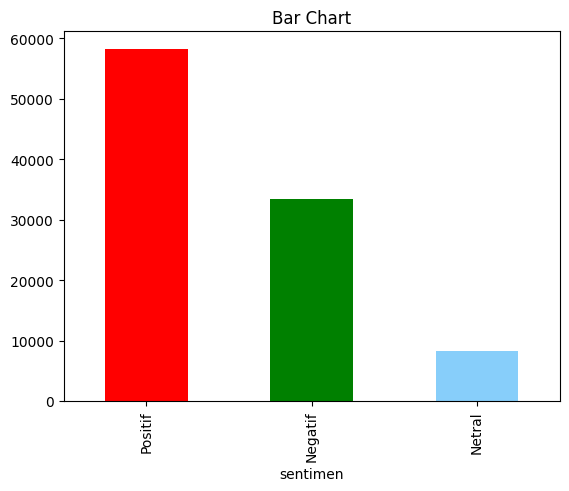

In [50]:
sentimen_data = pd.value_counts(new_df_copy['sentimen'], sort=True)
sentimen_data.plot(kind='bar', color=['red', 'green', 'lightskyblue'])
plt.title("Bar Chart")
plt.show

# 9. Pembobotan Kata dengan TF-IDF

Pada tahap ini dilakukan pembobotan kata dari hasil stemming dengan metode Term Inverse Document Frequency (TF-IDF).Metode TF-IDF digunakan untuk mengetahui seberapa sering suatu kata muncul di dalam dokumen. Tahap ini dibantu dengan library sklearn.

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Pastikan new_df berisi kolom 'Stemming' dan 'sentimen'
X = new_df_copy['Stemming']
Y = new_df_copy['sentimen']

# Misalkan x_train dan x_test adalah list token yang ingin digabungkan kembali menjadi teks
x_text = [' '.join(tokens) for tokens in X]

# Sekarang x_text berisi teks yang bisa digunakan untuk fit_transform
x_train, x_test, y_train, y_test = train_test_split(x_text, Y, test_size=0.2)

vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.transform(y_test)


In [52]:
# x_train dan x_test telah di-vektorisasi menggunakan TfidfVectorizer
# vectorizer = TfidfVectorizer()
# x_train = vectorizer.fit_transform(x_train)
# x_test = vectorizer.transform(x_test)

# Hitung total kemunculan setiap kata di semua dokumen
word_freq = x_train.sum(axis=0)

# Dapatkan indeks dari fitur kata pada vektorisasi
feature_names = vectorizer.get_feature_names_out()

# Buat daftar kata beserta jumlah kemunculannya
word_freq_list = [(word, word_freq[0, idx]) for word, idx in zip(feature_names, range(len(feature_names)))]

# Urutkan berdasarkan jumlah kemunculan kata
word_freq_list = sorted(word_freq_list, key=lambda x: x[1], reverse=True)

# Tampilkan beberapa kata beserta jumlah kemunculannya
num_words_to_display = 10  # Ganti dengan jumlah kata yang ingin ditampilkan
for word, freq in word_freq_list[:num_words_to_display]:
    print(f"Kata: {word}, Kemunculan: {freq}")


Kata: bagus, Kemunculan: 8285.474021942908
Kata: tiktok, Kemunculan: 3531.6909330377803
Kata: aplikasi, Kemunculan: 2533.117121937006
Kata: mantap, Kemunculan: 2462.4567497725625
Kata: buka, Kemunculan: 2360.3457472536256
Kata: nya, Kemunculan: 2339.980071477133
Kata: suka, Kemunculan: 1848.1755912207118
Kata: banget, Kemunculan: 1612.0224820541725
Kata: ok, Kemunculan: 1554.3091323483848
Kata: bug, Kemunculan: 1422.3871181018674


# 10. Klasifikasi dengan SVM

Klasifikasi ulasan pengguna dilakukan menggunakan algoritma Support Vector Machine yang akan dibantu dengan library Scikit-Learn. Proses klasifikasi menggunakan nilai data latih dan data uji sebesar 80%:20%, dilakukan percobaan sebanyak 5x dan kernel akan menggunakan kernel rbf dan kernel linear.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

SVM = svm.SVC(kernel='rbf')    #Jika dengan Kernel RBF
SVM.fit(x_train,y_train)

acc_score_rbf = cross_val_score(SVM, x_train, y_train, cv=5, scoring='accuracy')
pre_score_rbf = cross_val_score(SVM, x_train, y_train, cv=5, scoring='precision_macro')
rec_score_rbf = cross_val_score(SVM, x_train, y_train, cv=5, scoring='recall_macro')
f_score_rbf = cross_val_score(SVM, x_train, y_train, cv=5, scoring='f1_macro')

print('Hasil Accuracy : %s' % (acc_score_rbf))
print('Hasil Rata - Rata Accuracy : %s' % acc_score_rbf.mean())
print('Hasil Precision : %s' % (pre_score_rbf))
print('Hasil Rata - Rata Precision : %s' % pre_score_rbf.mean())
print('Hasil Recall : %s' % (rec_score_rbf))
print('Hasil Rata - Rata Recall : %s' % rec_score_rbf.mean())
print('Hasil F-Measure : %s' % (f_score_rbf))
print('Hasil Rata - Rata F-Measure : %s' % f_score_rbf.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

SVM = svm.SVC(kernel='linear') #Jika dengan Kernel Linear
SVM.fit(x_train,y_train)

acc_score_linear = cross_val_score(SVM, x_train, y_train, cv=5, scoring='accuracy')
pre_score_linear = cross_val_score(SVM, x_train, y_train, cv=5, scoring='precision_macro')
rec_score_linear = cross_val_score(SVM, x_train, y_train, cv=5, scoring='recall_macro')
f_score_linear = cross_val_score(SVM, x_train, y_train, cv=5, scoring='f1_macro')

print('Hasil Accuracy : %s' % (acc_score_linear))
print('Hasil Rata - Rata Accuracy : %s' % acc_score_linear.mean())
print('Hasil Precision : %s' % (pre_score_linear))
print('Hasil Rata - Rata Precision : %s' % pre_score_linear.mean())
print('Hasil Recall : %s' % (rec_score_linear))
print('Hasil Rata - Rata Recall : %s' % rec_score_linear.mean())
print('Hasil F-Measure : %s' % (f_score_linear))
print('Hasil Rata - Rata F-Measure : %s' % f_score_linear.mean())

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data evaluasi yang ingin diplot
scores = {
    'Accuracy': acc_score_rbf.mean(),
    'Precision': pre_score_rbf.mean(),
    'Recall': rec_score_rbf.mean(),
    'F-Measure': f_score_rbf.mean()
}

# Membuat DataFrame dari data evaluasi
eval_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Score'])

# Plot grafik garis Linear
eval_df['Score'].plot(kind='line', marker='o', color='blue')  # Grafik garis dengan penanda titik biru
plt.title('Hasil Evaluasi Model RBF')
plt.xlabel('Metrik')
plt.ylabel('Nilai Rata-Rata')
plt.grid(True)  # Menambahkan grid
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data evaluasi yang ingin diplot
scores = {
    'Accuracy': acc_score_linear.mean(),
    'Precision': pre_score_linear.mean(),
    'Recall': rec_score_linear.mean(),
    'F-Measure': f_score_linear.mean()
}

# Membuat DataFrame dari data evaluasi
eval_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Score'])

# Plot grafik garis Linear
eval_df['Score'].plot(kind='line', marker='o', color='blue')  # Grafik garis dengan penanda titik biru
plt.title('Hasil Evaluasi Model Linear')
plt.xlabel('Metrik')
plt.ylabel('Nilai Rata-Rata')
plt.grid(True)  # Menambahkan grid
plt.show()


# Hasil Klasifikasi

Hasil klasifikasi didapatkan bahwa pada pengujian pertama penggunaan data utuh berjumlah 1840 data didapatkan bahwa hasil akurasi terbaik pada data utuh dengan pengujian kernel Linear menghasilkan nilai akurasi sebesar 72,37%. Sedangkan untuk pengujian dengan kernel RBF tidak jauh berbeda hanya saja masih di bawah dari kernel linear yaitu sebesar 71,89%.

Dapat disimpulkan bahwa penggunaan kernel yang digunakan akan sangat berpengaruh terhadap hasil akurasi maka dari perlu untuk mengguji dengan berbagai kernel agar dapat mengetahui kernel terbaik.